# Customer Churn prediction

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### import data

In [2]:
data_path = '../data/botswana_bank_customer_churn.csv'
# Load the dataset
df = pd.read_csv(data_path, parse_dates=['Churn Date', 'Date of Birth'])

## Data Exploration


In [3]:
df.head() 
# Display the first few rows of the dataset

,RowNumber,CustomerId,Surname,First Name,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,...,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Reason,Churn Date,Balance,NumOfProducts,NumComplaints
0,1,83ef0b54-35f6-4f84-af58-5653ac0c0dc4,Smith,Troy,1987-08-29,Male,Divorced,3,Information systems manager,77710.14,...,Phone,397,24,41959.74,0,NaN,NaT,211359.05,1,0
1,2,009f115a-e5ca-4cf4-97d6-530140545e4e,Sullivan,Katrina,2000-02-07,Female,Married,1,Charity fundraiser,58209.87,...,Email,665,10,8916.67,0,NaN,NaT,30624.76,4,1
2,3,66309fd3-5009-44d3-a3f7-1657c869d573,Fuller,Henry,1954-02-03,Female,Single,1,Television production assistant,9794.01,...,Email,715,21,43270.54,0,NaN,NaT,111956.61,2,6
3,4,b02a30df-1a5f-4087-8075-2a35432da641,Young,Antonio,1991-01-15,Female,Divorced,5,Agricultural engineer,15088.98,...,Phone,747,17,17887.65,0,NaN,NaT,201187.61,1,0
4,5,0d932e5b-bb3a-4104-8c83-f84270f7f2ea,Andersen,John,1992-04-08,Female,Divorced,2,"Teacher, early years/pre",60726.56,...,Email,549,25,32686.84,0,NaN,NaT,60391.24,5,6


In [4]:
df_shape = df.shape
print(f"Rows: {df_shape[0]}, Columns: {df_shape[1]}")

Rows: 115640, Columns: 25


In [5]:
df_dtypes = df.dtypes
print("Data Types of Each Column:")
print(df_dtypes)
# Display the data types of each column

Data Types of Each Column:
RowNumber                                   int64
CustomerId                                 object
Surname                                    object
First Name                                 object
Date of Birth                      datetime64[ns]
Gender                                     object
Marital Status                             object
Number of Dependents                        int64
Occupation                                 object
Income                                    float64
Education Level                            object
Address                                    object
Contact Information                        object
Customer Tenure                             int64
Customer Segment                           object
Preferred Communication Channel            object
Credit Score                                int64
Credit History Length                       int64
Outstanding Loans                         float64
Churn Flag             

In [6]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)
# Display the number of missing values in each column

Missing Values in Each Column:
RowNumber                               0
CustomerId                              0
Surname                                 0
First Name                              0
Date of Birth                           0
Gender                                  0
Marital Status                          0
Number of Dependents                    0
Occupation                              0
Income                                  0
Education Level                         0
Address                                 0
Contact Information                     0
Customer Tenure                         0
Customer Segment                        0
Preferred Communication Channel         0
Credit Score                            0
Credit History Length                   0
Outstanding Loans                       0
Churn Flag                              0
Churn Reason                       101546
Churn Date                         101546
Balance                                 0
Num

In [7]:
# Display a summary of the dataset (including non-null counts and data types)
df_info = df.info()
print("Dataset Summary:")
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   RowNumber                        115640 non-null  int64         
 1   CustomerId                       115640 non-null  object        
 2   Surname                          115640 non-null  object        
 3   First Name                       115640 non-null  object        
 4   Date of Birth                    115640 non-null  datetime64[ns]
 5   Gender                           115640 non-null  object        
 6   Marital Status                   115640 non-null  object        
 7   Number of Dependents             115640 non-null  int64         
 8   Occupation                       115640 non-null  object        
 9   Income                           115640 non-null  float64       
 10  Education Level                  115640 non-

-
-
-
-
-








## Preprocessing and Feature Engineering

### Data cleaning

In [8]:
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname', 'First Name','Contact Information','Address'], axis=1, inplace=False) # Drop the columns that are not needed

In [9]:
# Convert categorical columns to category data type

from datetime import datetime
curernt_year = datetime.now().year
df_clean['Age'] = curernt_year - df_clean['Date of Birth'].dt.year # Calculate the age of the customer from the date of birth
df_clean.drop(['Date of Birth'], axis=1, inplace=True) # Drop the date of birth column as it is no longer needed

df_clean['Gender'] = df_clean['Gender'].map({'Male':1, 'Female':0}) # Convert the gender to numeric values
df_clean['Gender'] = df_clean['Gender'].fillna(-1) #



In [10]:
# the rows which have missing values in the 'Churn Date' column and the 'churn reason' column mean that the customer has not churned yet
df_clean['Churn Reason'] = df_clean['Churn Reason'].fillna('Not Churned') # fill the missing values in the 'Churn Reason' column with 'Not Churned'

In [11]:
(df_clean.isna().sum() / df_clean.shape[0] * 100).round(2) # the percentage of missing values in each column
# the rows which have missing values in the 'Churn Date' column and the 'Churn Reason' column mean that the customer has not churned yetet

Gender                              0.00
Marital Status                      0.00
Number of Dependents                0.00
Occupation                          0.00
Income                              0.00
Education Level                     0.00
Customer Tenure                     0.00
Customer Segment                    0.00
Preferred Communication Channel     0.00
Credit Score                        0.00
Credit History Length               0.00
Outstanding Loans                   0.00
Churn Flag                          0.00
Churn Reason                        0.00
Churn Date                         87.81
Balance                             0.00
NumOfProducts                       0.00
NumComplaints                       0.00
Age                                 0.00
dtype: float64

### Explore the data after cleaning

In [12]:
df_clean.head() # Show the first 5 rows of the dataset

,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Reason,Churn Date,Balance,NumOfProducts,NumComplaints,Age
0,1,Divorced,3,Information systems manager,77710.14,High School,30,Retail,Phone,397,24,41959.74,0,Not Churned,NaT,211359.05,1,0,38
1,0,Married,1,Charity fundraiser,58209.87,High School,27,SME,Email,665,10,8916.67,0,Not Churned,NaT,30624.76,4,1,25
2,0,Single,1,Television production assistant,9794.01,High School,14,Retail,Email,715,21,43270.54,0,Not Churned,NaT,111956.61,2,6,71
3,0,Divorced,5,Agricultural engineer,15088.98,High School,23,Corporate,Phone,747,17,17887.65,0,Not Churned,NaT,201187.61,1,0,34
4,0,Divorced,2,"Teacher, early years/pre",60726.56,Master's,22,Corporate,Email,549,25,32686.84,0,Not Churned,NaT,60391.24,5,6,33


In [13]:
df_clean.info() # Show the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Gender                           115640 non-null  int64         
 1   Marital Status                   115640 non-null  object        
 2   Number of Dependents             115640 non-null  int64         
 3   Occupation                       115640 non-null  object        
 4   Income                           115640 non-null  float64       
 5   Education Level                  115640 non-null  object        
 6   Customer Tenure                  115640 non-null  int64         
 7   Customer Segment                 115640 non-null  object        
 8   Preferred Communication Channel  115640 non-null  object        
 9   Credit Score                     115640 non-null  int64         
 10  Credit History Length            115640 non-

In [14]:
df_clean.describe() # show the summary statistics of the dataset

,Gender,Number of Dependents,Income,Customer Tenure,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Date,Balance,NumOfProducts,NumComplaints,Age
count,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,14094,115640.000000,115640.000000,115640.000000,115640.000000
mean,0.499914,2.502923,52641.363046,15.490591,574.299775,15.546602,25502.731792,0.121878,2024-04-20 05:09:59.233716480,124639.209748,2.999274,4.991724,47.880387
min,0.000000,0.000000,5000.960000,1.000000,300.000000,1.000000,1000.430000,0.000000,2024-01-01 00:00:00,1.060000,1.000000,0.000000,19.000000
25%,0.000000,1.000000,28857.070000,8.000000,436.000000,8.000000,13226.060000,0.000000,2024-02-26 00:00:00,61991.915000,2.000000,2.000000,33.000000
50%,0.000000,3.000000,52658.110000,15.000000,574.000000,16.000000,25505.285000,0.000000,2024-04-21 00:00:00,124505.890000,3.000000,5.000000,48.000000
75%,1.000000,4.000000,76364.157500,23.000000,712.000000,23.000000,37742.250000,0.000000,2024-06-14 00:00:00,187122.922500,4.000000,8.000000,62.000000
max,1.000000,5.000000,99999.510000,30.000000,850.000000,30.000000,49999.690000,1.000000,2024-08-07 00:00:00,249998.910000,5.000000,10.000000,77.000000
std,0.500002,1.707249,27429.756390,8.654217,159.067499,8.654630,14127.859827,0.327147,NaN,72210.476638,1.411361,3.159283,16.714307


### Handle outliers and ensure data consistency


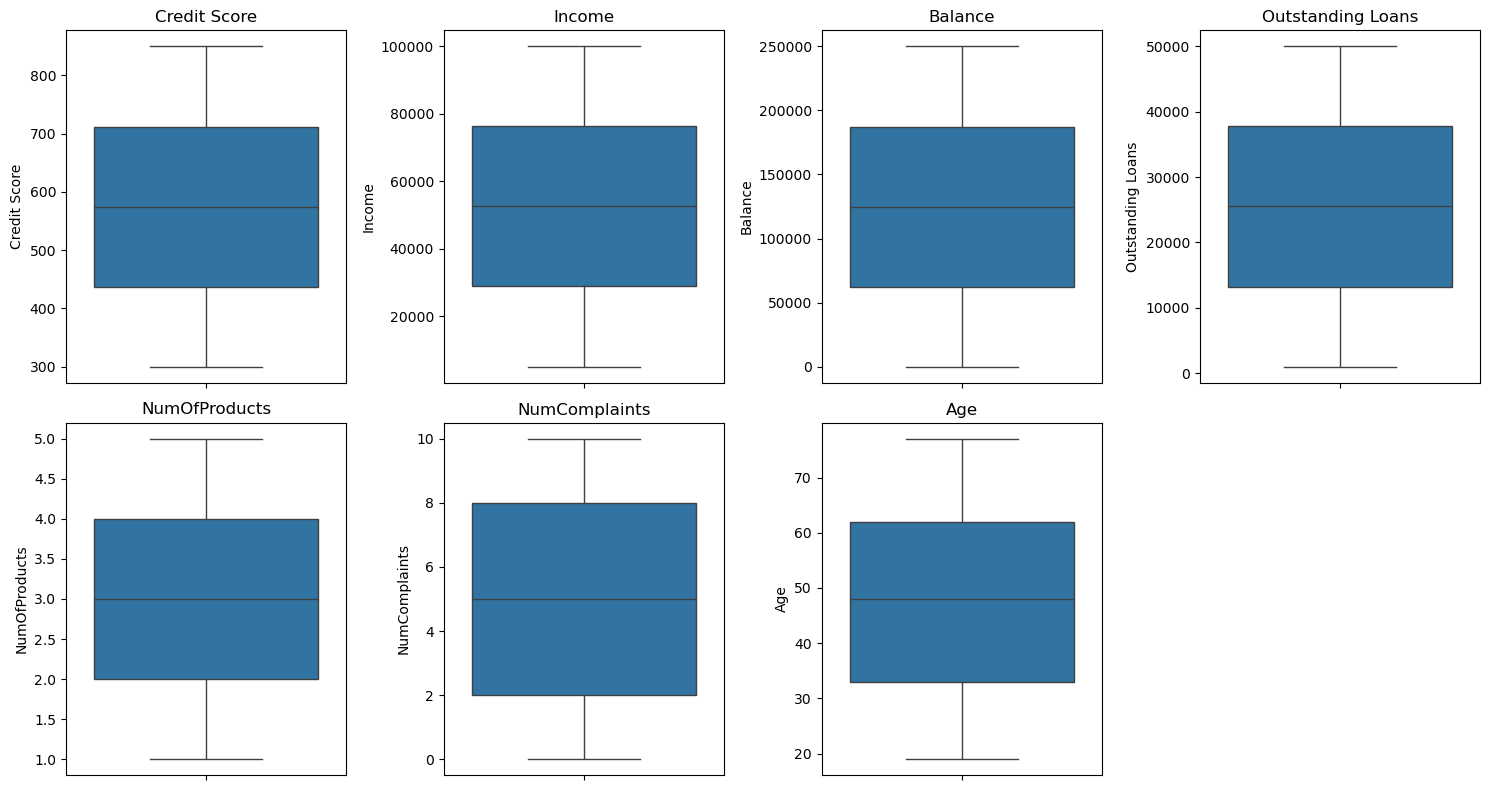

In [15]:
numerical_cols = [
    'Credit Score', 'Income', 'Balance', 'Outstanding Loans', 
    'NumOfProducts', 'NumComplaints', 'Age'
]


plt.figure(figsize  =  ( 15 , 8 )) 
for  i,  col  in  enumerate ( numerical_cols,  1  ): 
    plt.  subplot ( 2 ,  4 ,  i ) 
    sns.  boxplot ( data  =  df_clean,  y  =  col ) 
    plt.  title (  col  ) 
plt.  tight_layout () 
plt.  show () 

In [16]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers (≤ {lower_bound:.2f} or ≥ {upper_bound:.2f})")
    # Cap values
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                         np.where(df[column] > upper_bound, upper_bound, 
                                 df[column]))
    return df


numerical_cols = ['Credit Score', 'Income', 'Balance', 'Outstanding Loans', 
                 'NumOfProducts', 'NumComplaints', 'Age']
print("=== Outliers Detected (Before Capping) ===")
for col in numerical_cols:
    df_clean = cap_outliers(df_clean, col)

print("\nOutliers capped to 1.5x IQR range. Safe to proceed!")

=== Outliers Detected (Before Capping) ===
Credit Score: 0 outliers (≤ 22.00 or ≥ 1126.00)
Income: 0 outliers (≤ -42403.56 or ≥ 147624.79)
Balance: 0 outliers (≤ -125704.60 or ≥ 374819.43)
Outstanding Loans: 0 outliers (≤ -23548.23 or ≥ 74516.54)
NumOfProducts: 0 outliers (≤ -1.00 or ≥ 7.00)
NumComplaints: 0 outliers (≤ -7.00 or ≥ 17.00)
Age: 0 outliers (≤ -10.50 or ≥ 105.50)

Outliers capped to 1.5x IQR range. Safe to proceed!


### Transform features.

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Categorical columns to encode
categorical_cols = [
    'Gender',  
    'Marital Status', 
    'Occupation', 
    'Education Level', 
    'Customer Segment', 
    'Preferred Communication Channel',
    'Churn Reason'
]

# One-Hot Encoding (for non-binary categories)
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df_clean[categorical_cols[1:]])  # Skip 'Gender'

# Create DataFrame for encoded features
encoded_df = pd.DataFrame(
    encoded_features,
    columns=encoder.get_feature_names_out(categorical_cols[1:])
)

# Combine with numerical data
final_data = pd.concat([
    df_clean.drop(columns=categorical_cols),  # Original data without categorical cols
    encoded_df                                  # Encoded categoricals
], axis=1)

print("\nFinal Data Shape:", final_data.shape)
print("First 3 rows (sample):")
print(final_data.iloc[:, :10].head(3))  # Show first 10 columns for brevity


Final Data Shape: (115640, 662)
First 3 rows (sample):
   Number of Dependents    Income  Customer Tenure  Credit Score  \
0                     3  77710.14               30         397.0   
1                     1  58209.87               27         665.0   
2                     1   9794.01               14         715.0   

   Credit History Length  Outstanding Loans  Churn Flag Churn Date    Balance  \
0                     24           41959.74           0        NaT  211359.05   
1                     10            8916.67           0        NaT   30624.76   
2                     21           43270.54           0        NaT  111956.61   

   NumOfProducts  
0            1.0  
1            4.0  
2            2.0  


### visualize the data

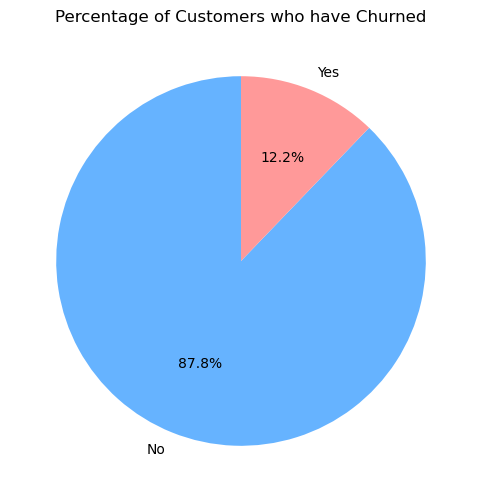

In [18]:
is_churned = df_clean['Churn Flag'].map({0: 'No', 1: 'Yes'}) # create a new column 'is_churned' which maps the 'Churn Flag' column to 'Yes' and 'No'
counts = is_churned.value_counts() # count the number of customers who have churned and who have not churned

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Percentage of Customers who have Churned')
plt.show()

In [19]:
# get the relationship between the 'Churn Flag' column and the other columns in the dataset

numeric_columns = df_clean.select_dtypes(include=np.number).columns # select the numeric columns in the dataset
correlation_matrix = df_clean[numeric_columns].corr() # calculate the correlation matrix
correlation_matrix['Churn Flag']

Gender                   0.001280
Number of Dependents     0.003109
Income                   0.002286
Customer Tenure          0.000344
Credit Score            -0.182802
Credit History Length    0.002899
Outstanding Loans       -0.001146
Churn Flag               1.000000
Balance                 -0.499981
NumOfProducts           -0.179083
NumComplaints            0.204626
Age                     -0.002433
Name: Churn Flag, dtype: float64

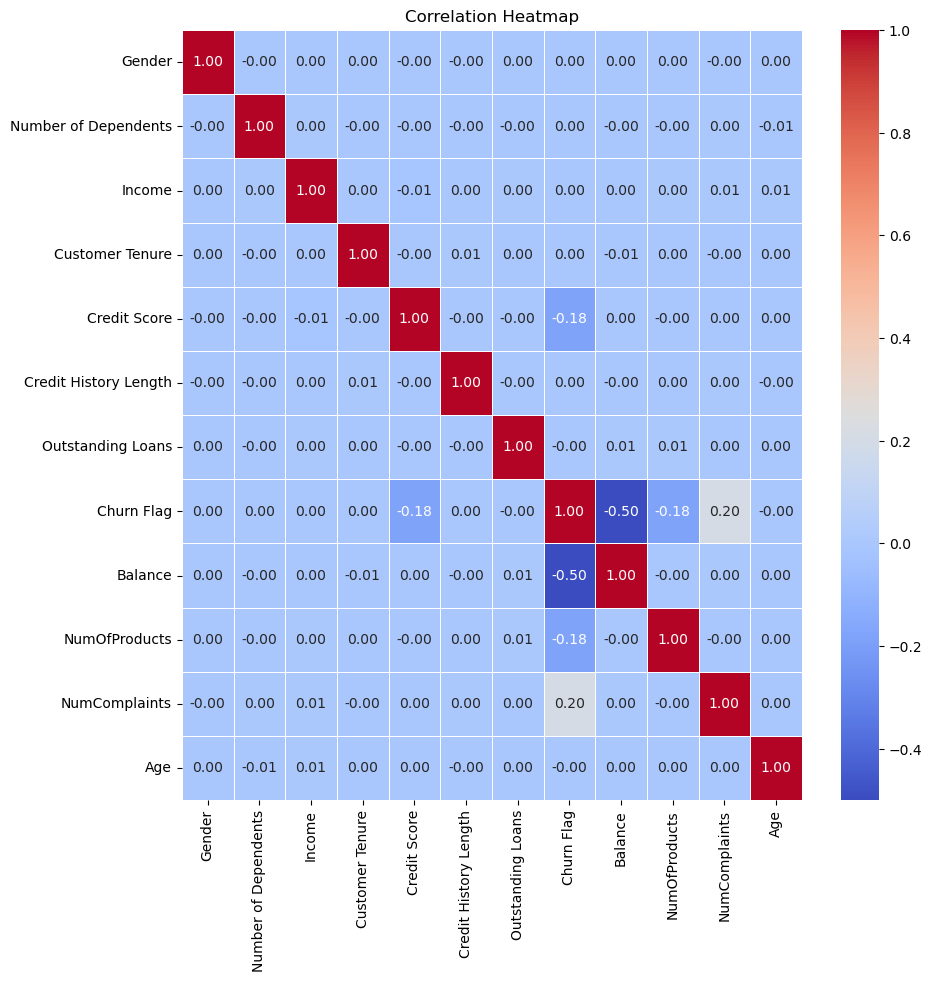

In [20]:
# Display the correlation matrix

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

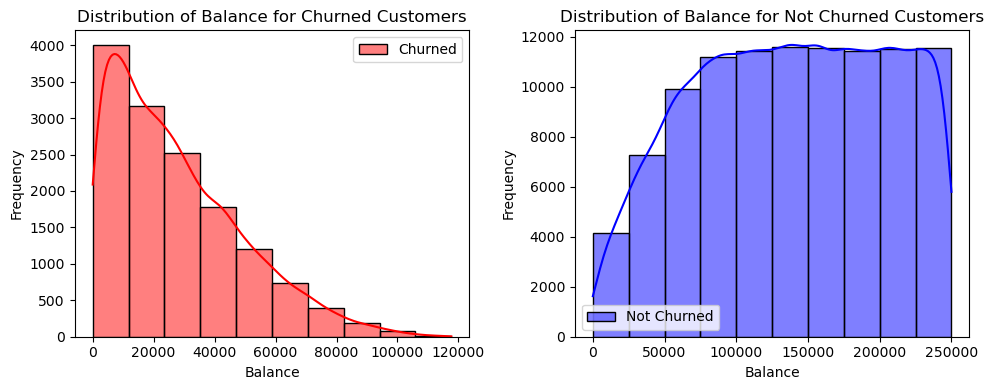

In [21]:
# Plot the distribution of the 'Balance' column for churned and not churned customers

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)

sns.histplot(df_clean[df_clean['Churn Flag'] == 1]['Balance'], color='red', kde=True, label='Churned', bins=10)
plt.title('Distribution of Balance for Churned Customers')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df_clean[df_clean['Churn Flag'] == 0]['Balance'], color='blue', kde=True, label='Not Churned', bins=10)
plt.title('Distribution of Balance for Not Churned Customers')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.legend()
plt.show()

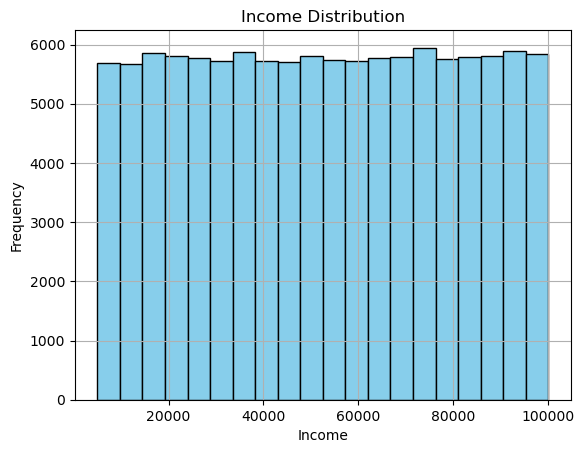

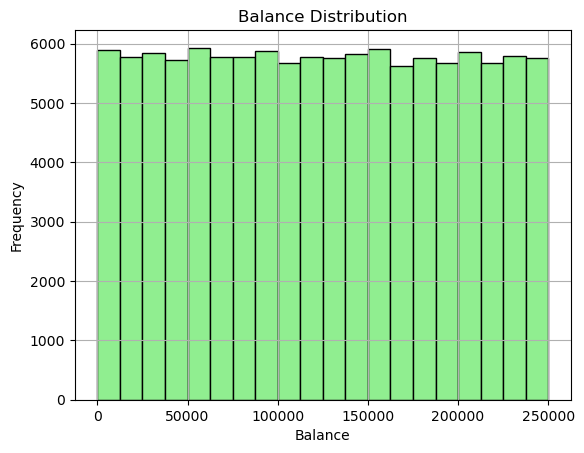

In [22]:
# Histogram for 'Income'
df_clean['Income'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'Balance'
df_clean['Balance'].hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

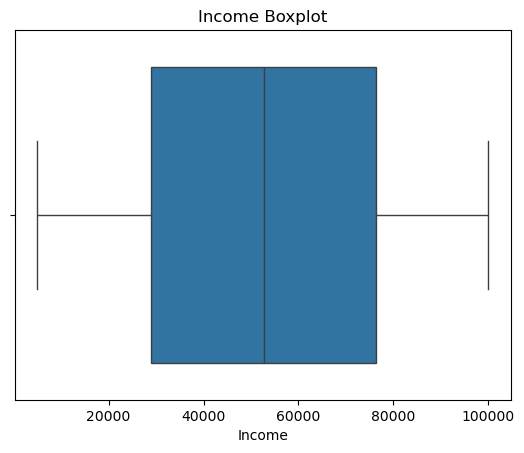

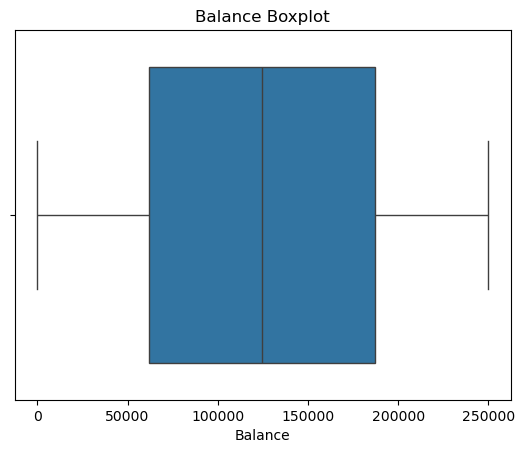

In [23]:
import seaborn as sns

# Boxplot for 'Income'
sns.boxplot(x=df_clean['Income'])
plt.title('Income Boxplot')
plt.show()

# Boxplot for 'Balance'
sns.boxplot(x=df_clean['Balance'])
plt.title('Balance Boxplot')
plt.show()

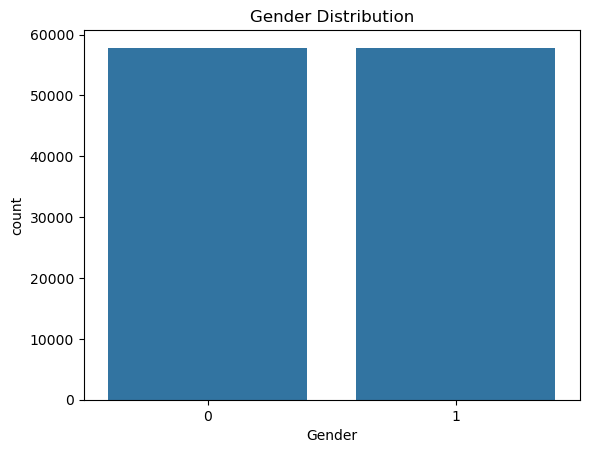

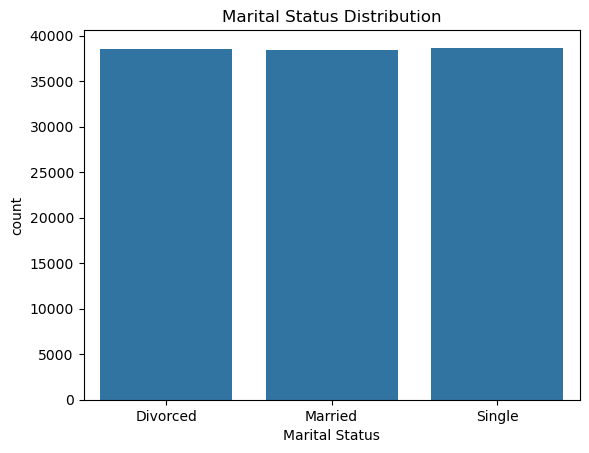

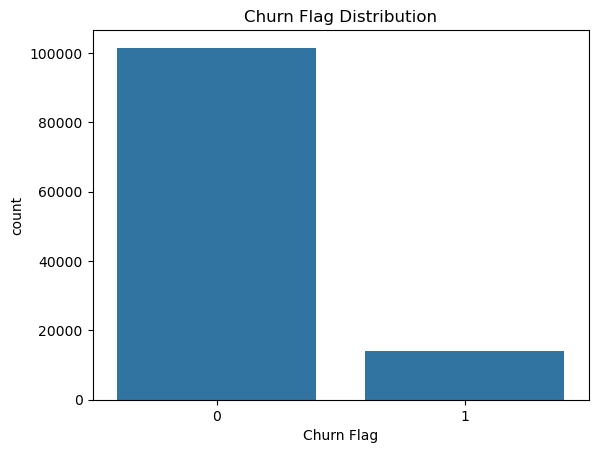

In [24]:
# Countplot for 'Gender'
sns.countplot(x=df_clean['Gender'])
plt.title('Gender Distribution')
plt.show()

# Countplot for 'Marital Status'
sns.countplot(x=df_clean['Marital Status'])
plt.title('Marital Status Distribution')
plt.show()

# Countplot for 'Churn Flag' (Target Variable)
sns.countplot(x=df_clean['Churn Flag'])
plt.title('Churn Flag Distribution')
plt.show()

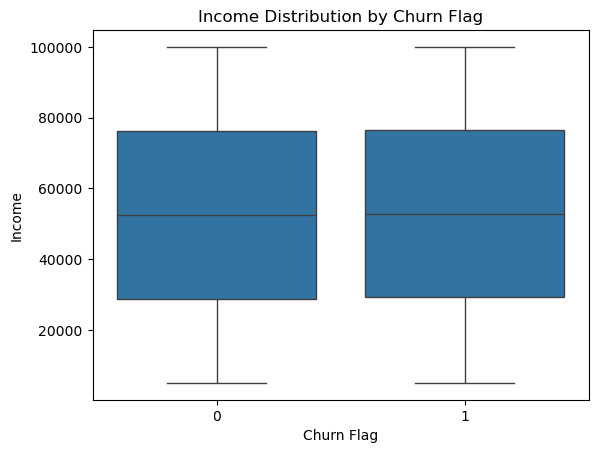

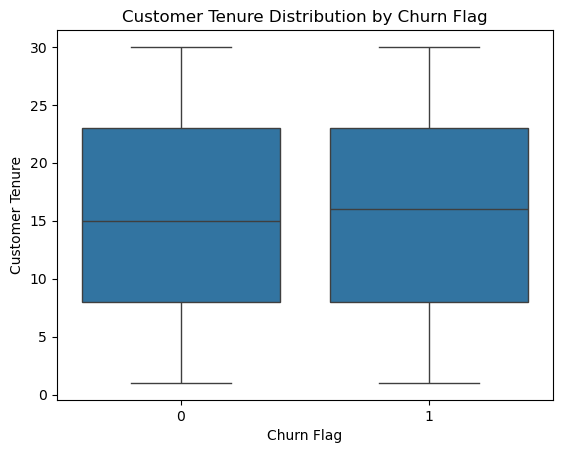

In [25]:
# Compare 'Churn Flag' with 'Income'
sns.boxplot(x='Churn Flag', y='Income', data=df_clean)
plt.title('Income Distribution by Churn Flag')
plt.show()

# Compare 'Churn Flag' with 'Customer Tenure'
sns.boxplot(x='Churn Flag', y='Customer Tenure', data=df_clean)
plt.title('Customer Tenure Distribution by Churn Flag')
plt.show()


## EDA

### 📊 Basic Information

📐 Dimensions: 115640 rows × 19 columns

🔠 Data Types:
- float64: 7 columns
- object: 6 columns
- int64: 5 columns
- datetime64[ns]: 1 columns

💾 Memory Usage: 50.43 MB



### ❓ Missing Values

,Missing Count,Missing %
Churn Date,101546,87.812



✅ No duplicate rows found

✨ Cleaning complete!
Final shape: 115640 rows, 19 columns


### 🔢 Numerical Variables Statistics

,count,mean,std,min,25%,50%,75%,max
Gender,115640.000000,0.499914,0.500002,0.000000,0.000000,0.000000,1.000000,1.000000
Number of Dependents,115640.000000,2.502923,1.707249,0.000000,1.000000,3.000000,4.000000,5.000000
Income,115640.000000,52641.363046,27429.756390,5000.960000,28857.070000,52658.110000,76364.157500,99999.510000
Customer Tenure,115640.000000,15.490591,8.654217,1.000000,8.000000,15.000000,23.000000,30.000000
Credit Score,115640.000000,574.299775,159.067499,300.000000,436.000000,574.000000,712.000000,850.000000
Credit History Length,115640.000000,15.546602,8.654630,1.000000,8.000000,16.000000,23.000000,30.000000
Outstanding Loans,115640.000000,25502.731792,14127.859827,1000.430000,13226.060000,25505.285000,37742.250000,49999.690000
Churn Flag,115640.000000,0.121878,0.327147,0.000000,0.000000,0.000000,0.000000,1.000000
Balance,115640.000000,124639.209748,72210.476638,1.060000,61991.915000,124505.890000,187122.922500,249998.910000
NumOfProducts,115640.000000,2.999274,1.411361,1.000000,2.000000,3.000000,4.000000,5.000000



### 🔤 Categorical Variables Summary

,Unique Values,Most Common,Frequency,Frequency %
Marital Status,3,Single,38684,33.500000
Occupation,639,"Engineer, materials",222,0.200000
Education Level,4,Master's,28970,25.100000
Customer Segment,3,SME,38903,33.600000
Preferred Communication Channel,2,Email,58044,50.200000
Churn Reason,5,Not Churned,101546,87.800000


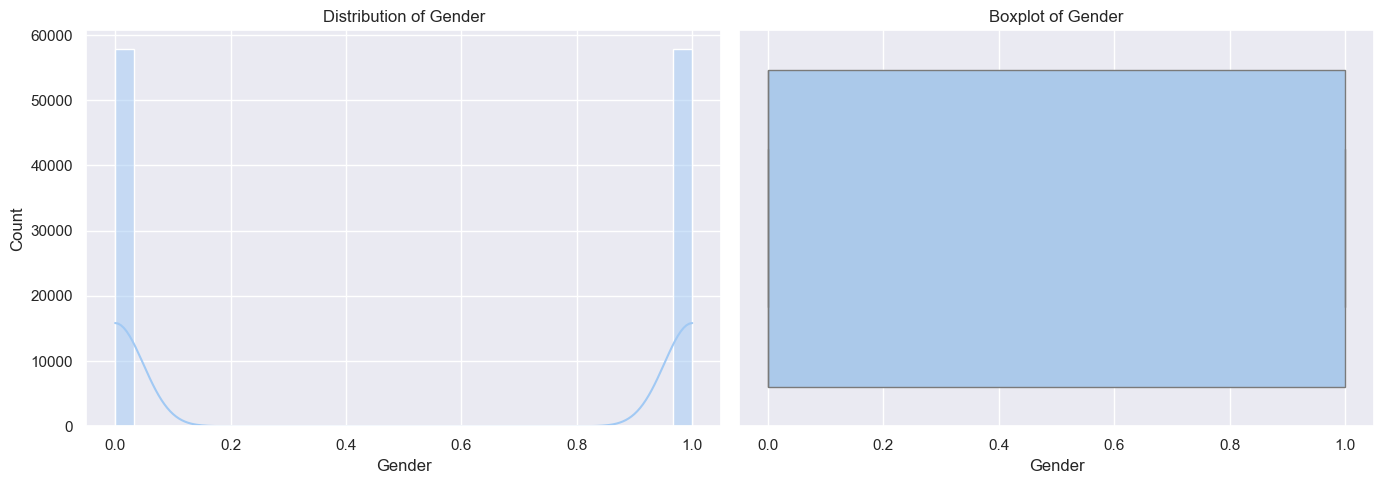

Gender:
Skewness: 0.00 | Kurtosis: -2.00



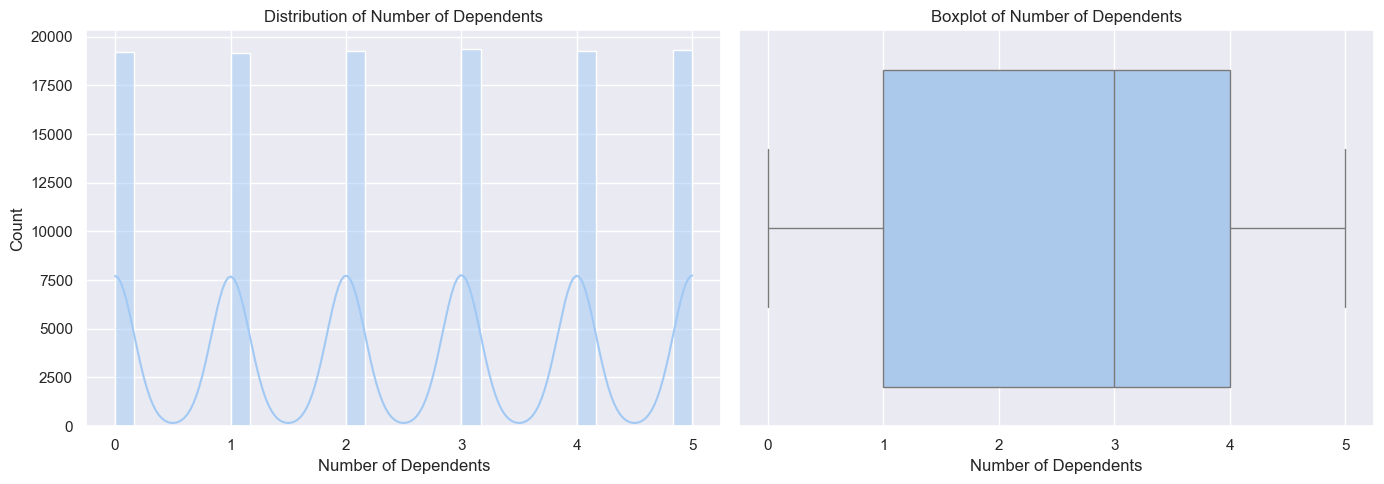

Number of Dependents:
Skewness: -0.00 | Kurtosis: -1.27



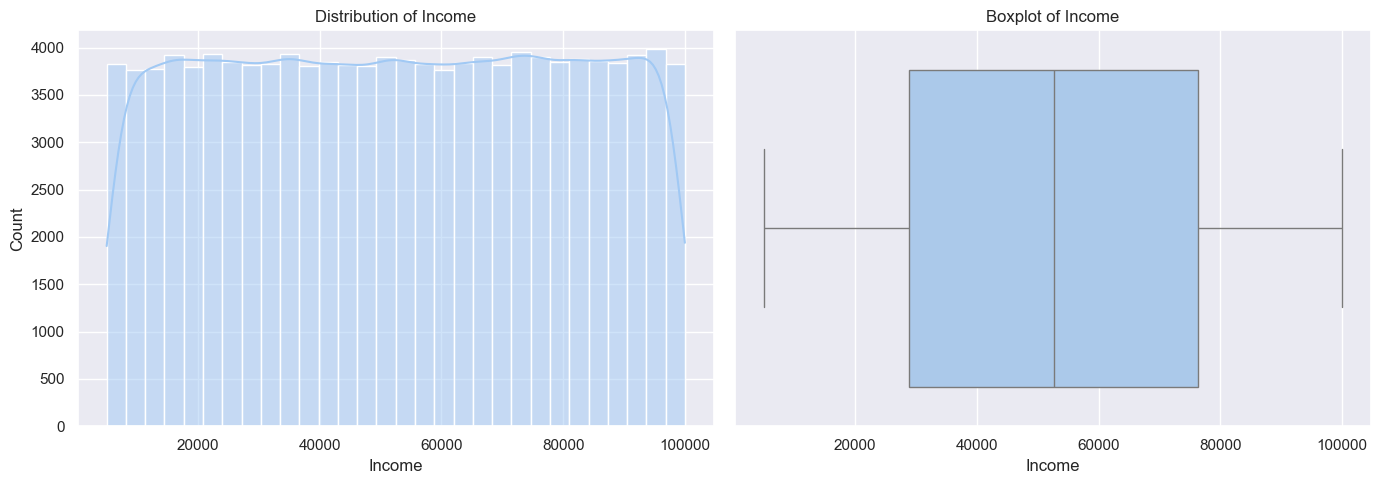

Income:
Skewness: -0.00 | Kurtosis: -1.20



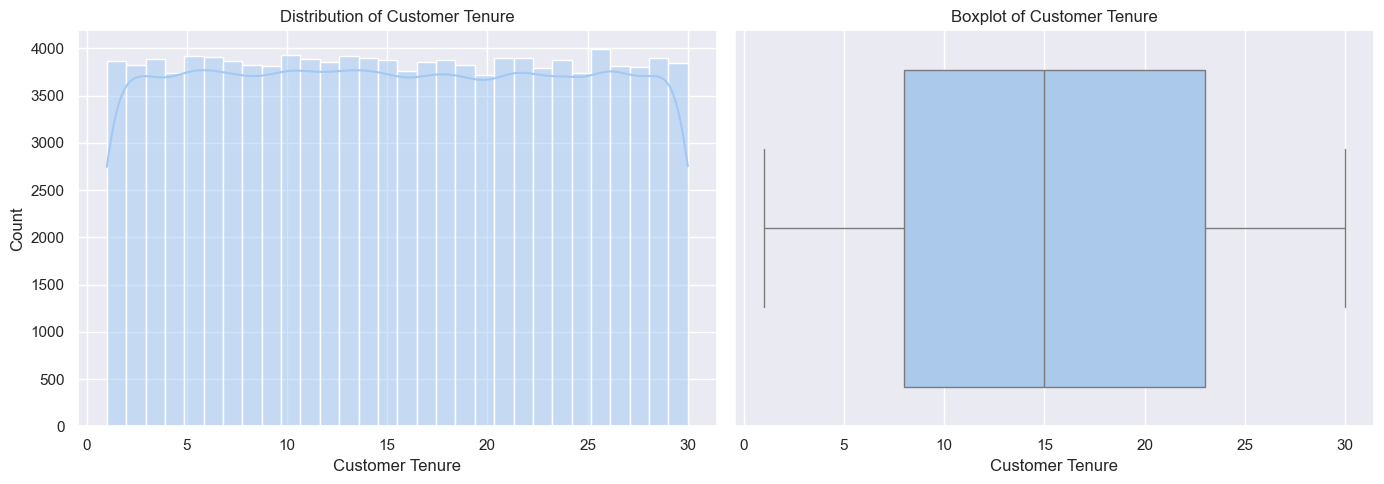

Customer Tenure:
Skewness: 0.00 | Kurtosis: -1.20



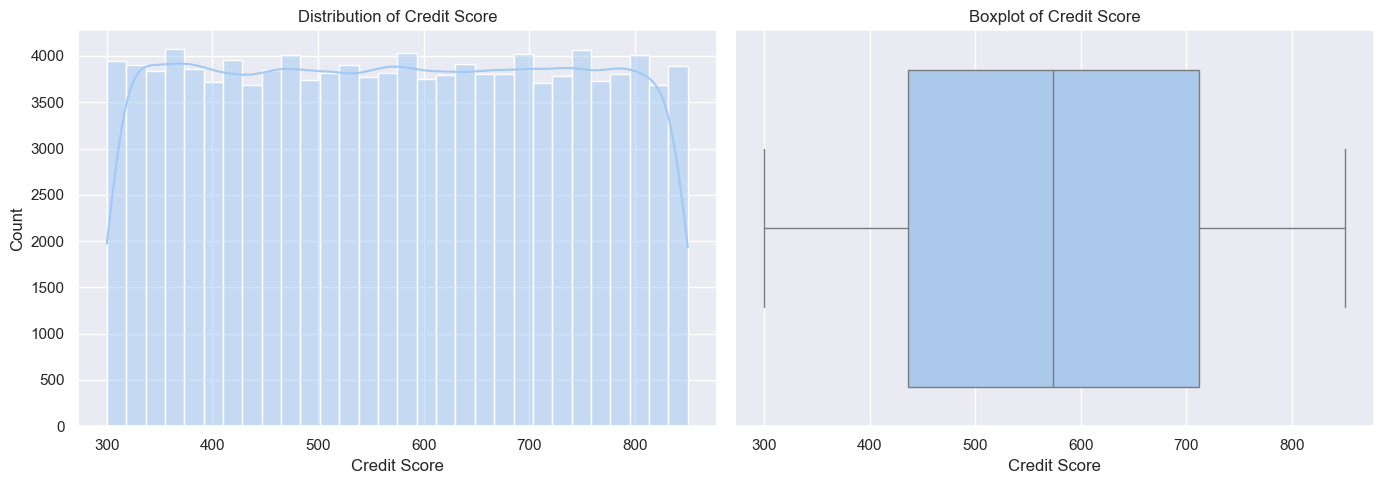

Credit Score:
Skewness: 0.00 | Kurtosis: -1.20



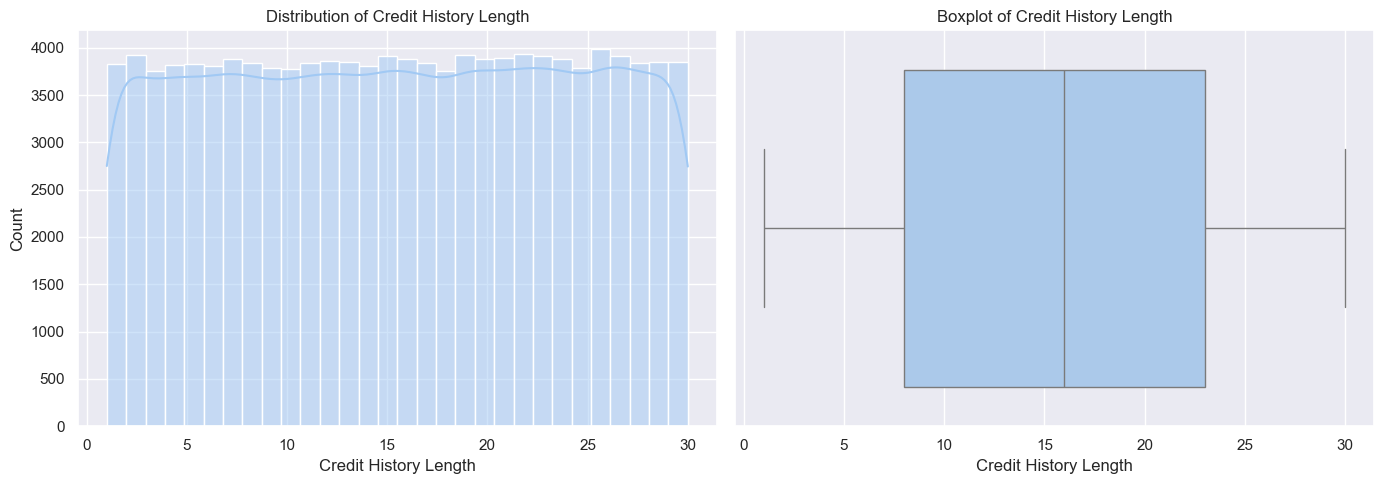

Credit History Length:
Skewness: -0.01 | Kurtosis: -1.20



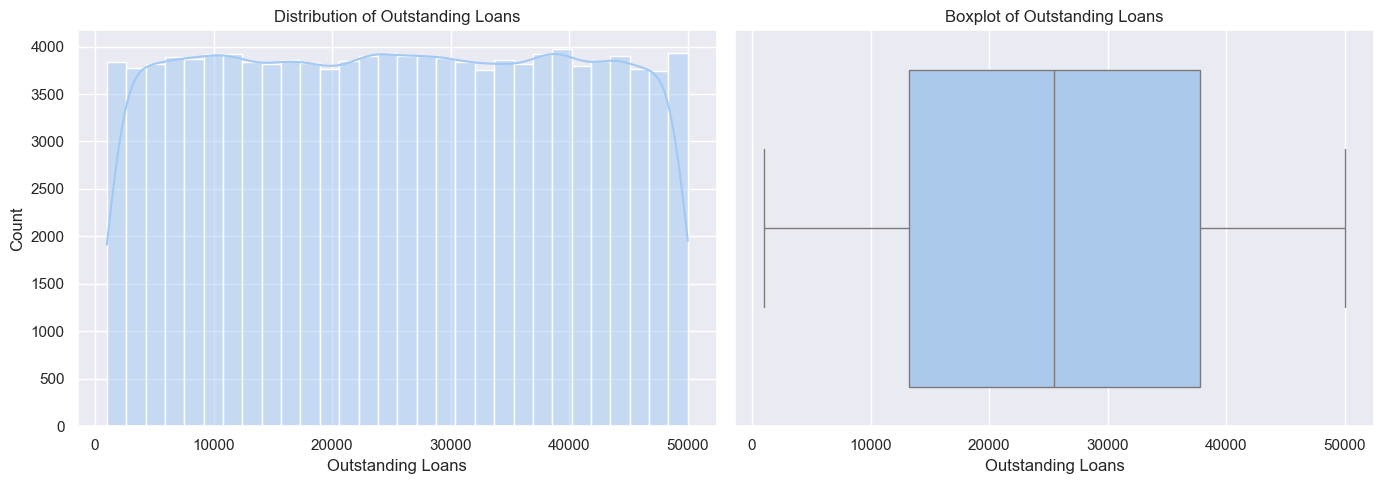

Outstanding Loans:
Skewness: 0.00 | Kurtosis: -1.20



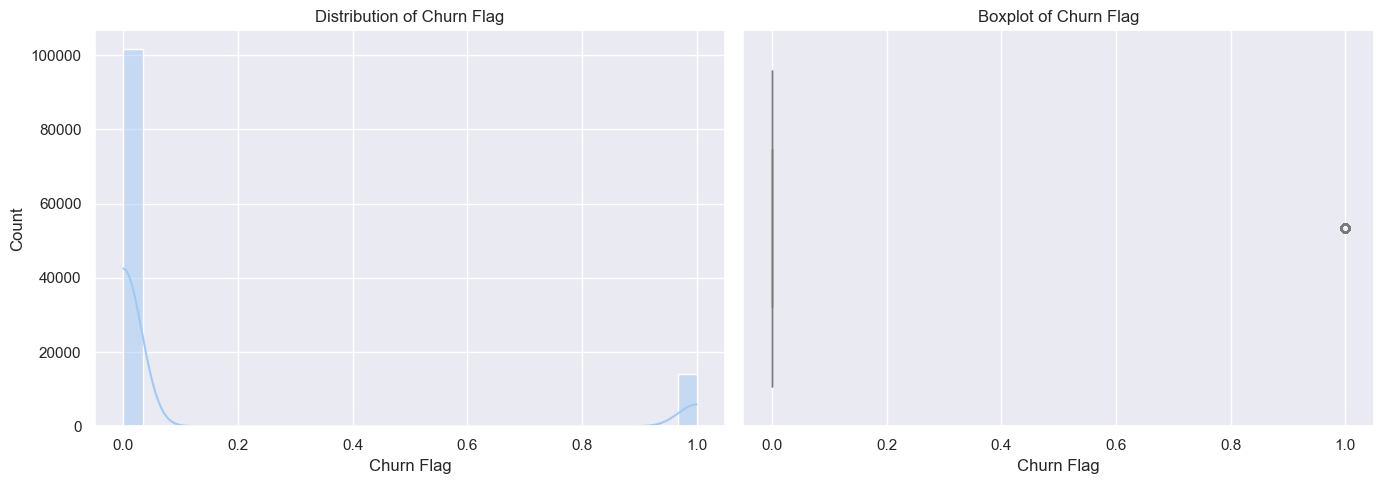

Churn Flag:
Skewness: 2.31 | Kurtosis: 3.34



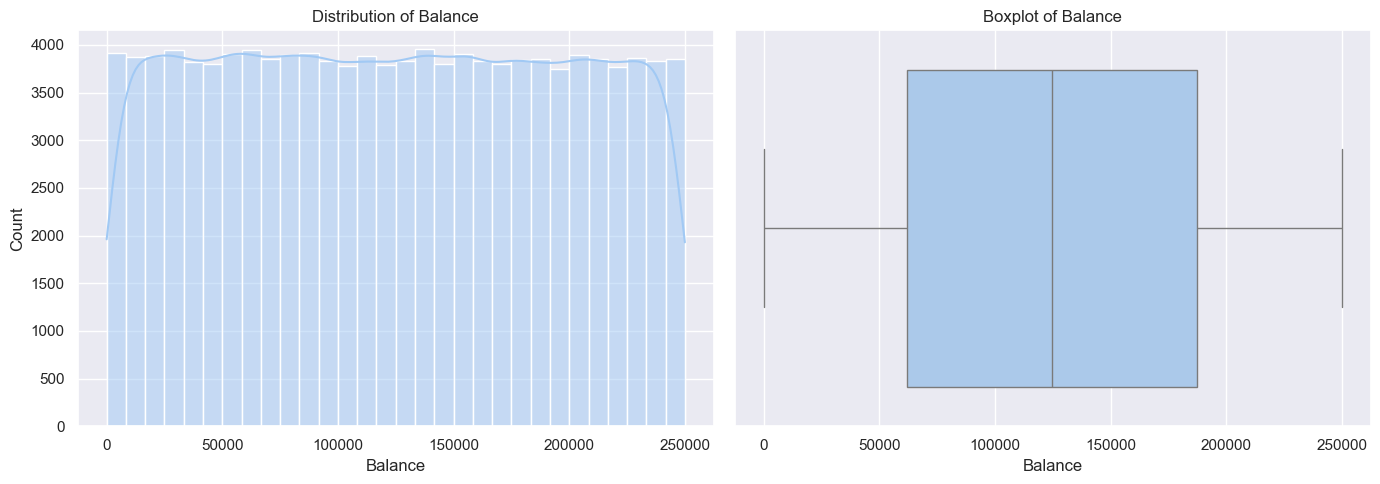

Balance:
Skewness: 0.01 | Kurtosis: -1.20



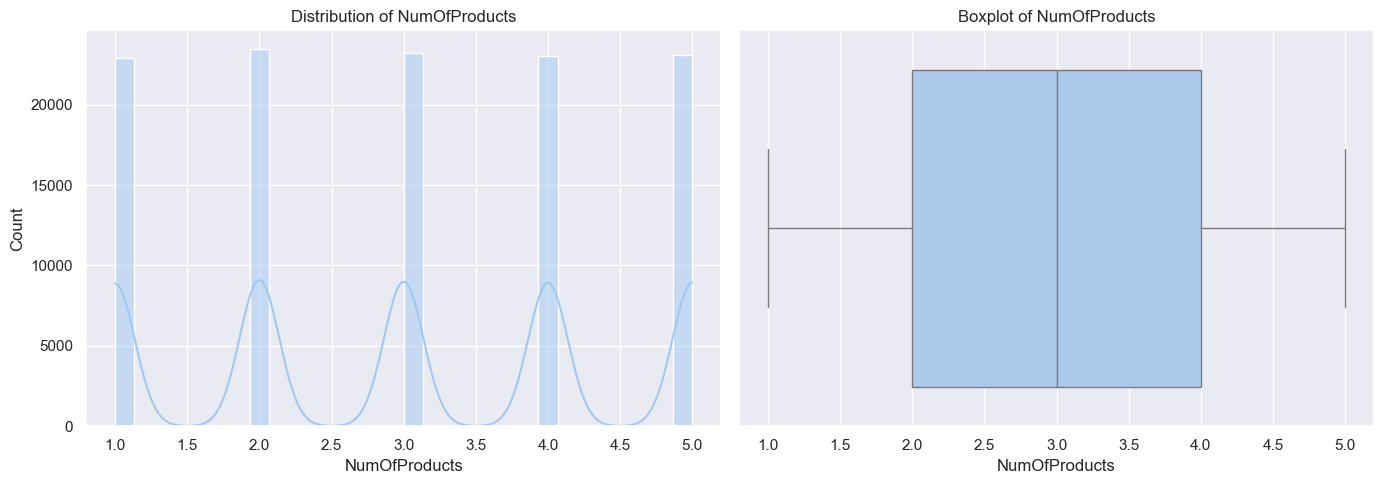

NumOfProducts:
Skewness: 0.00 | Kurtosis: -1.30



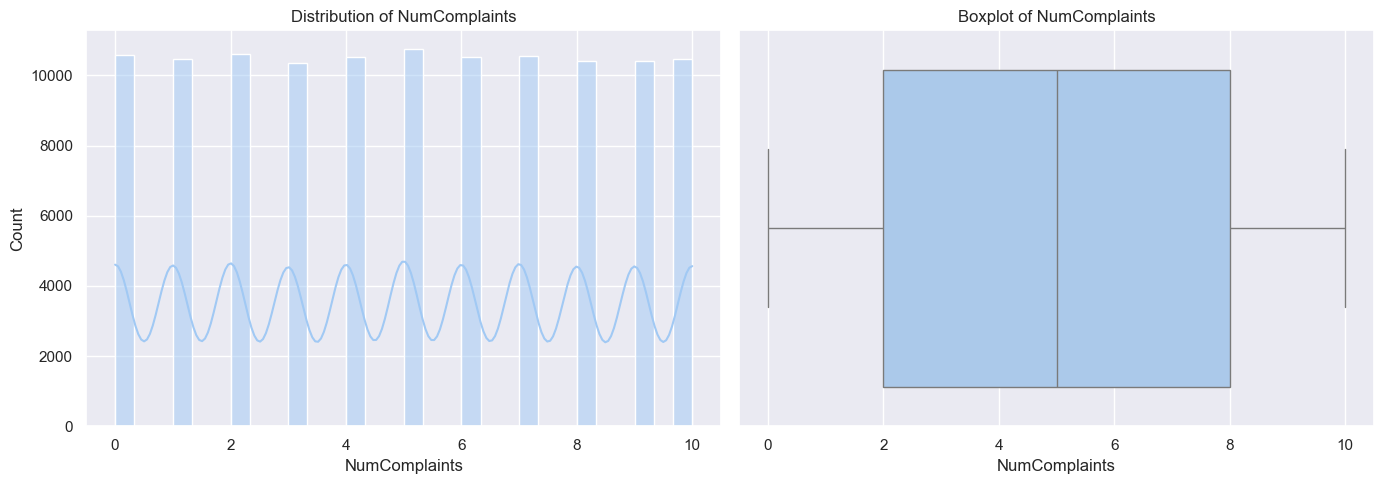

NumComplaints:
Skewness: 0.00 | Kurtosis: -1.22



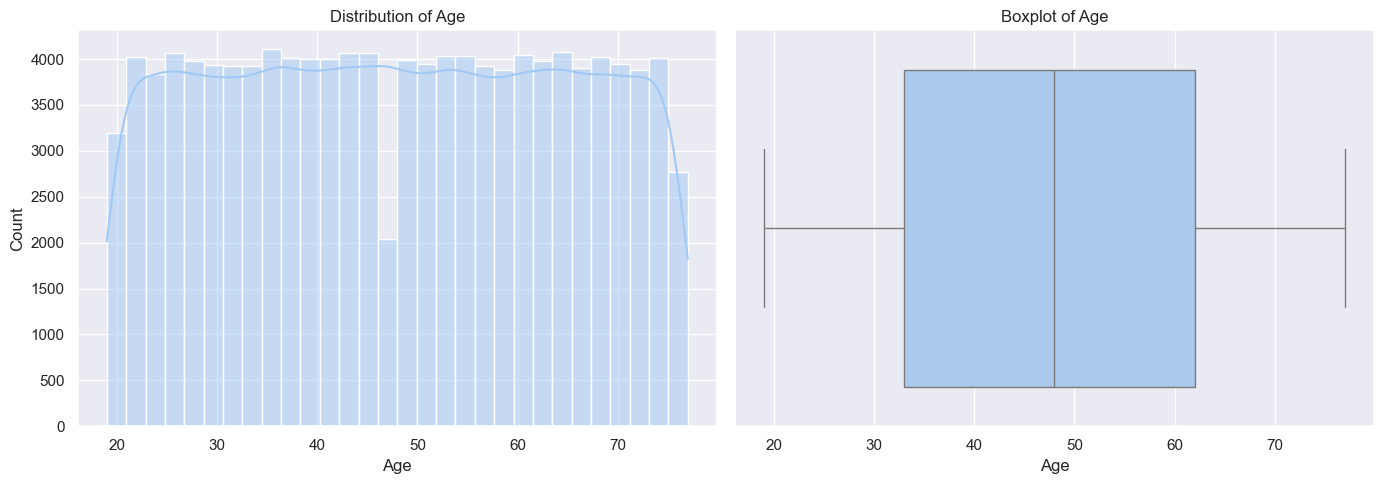

Age:
Skewness: 0.00 | Kurtosis: -1.19



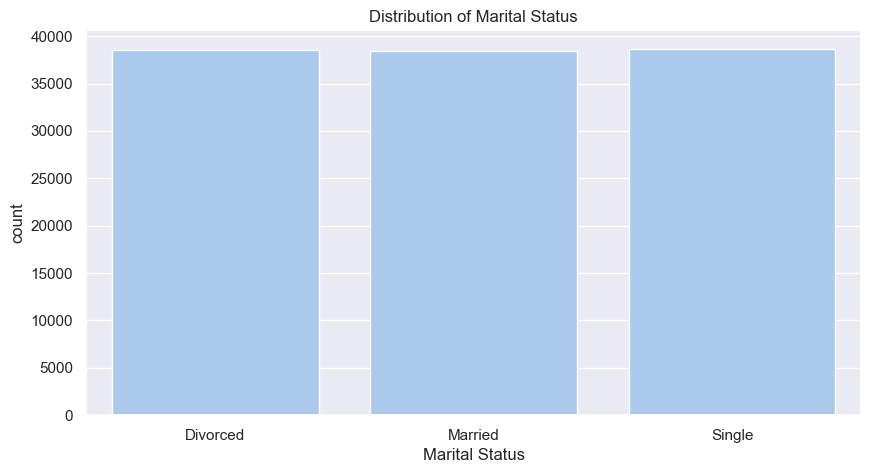

Skipping Occupation - too many categories (639)


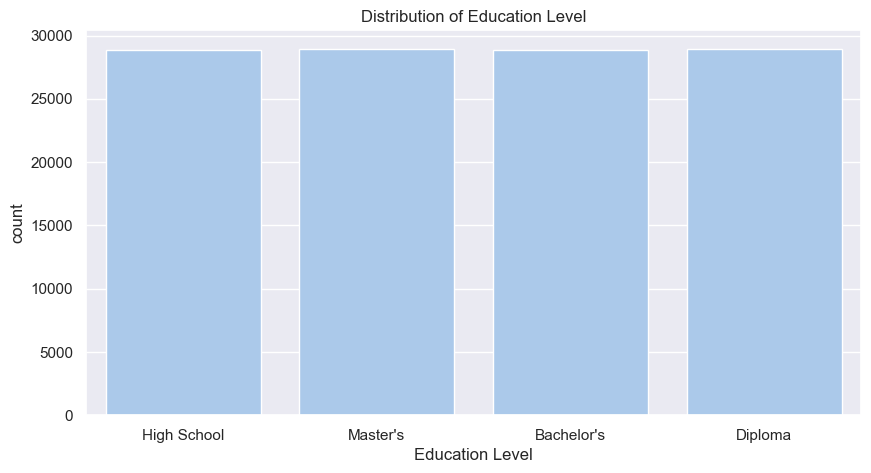

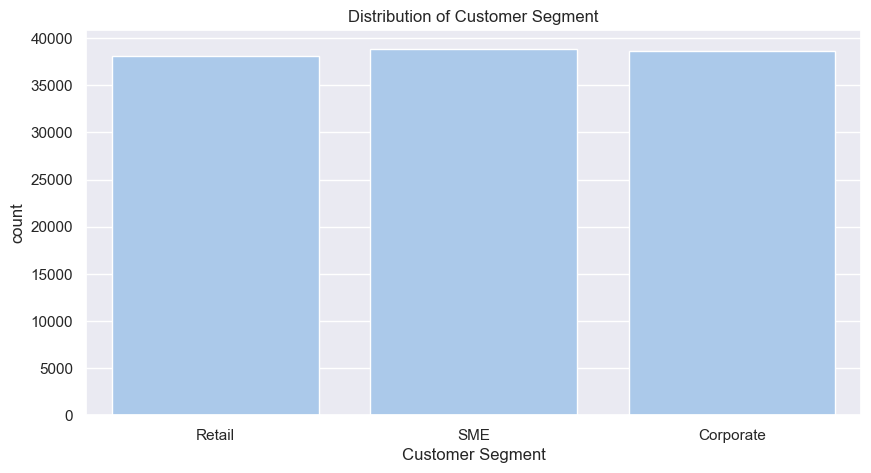

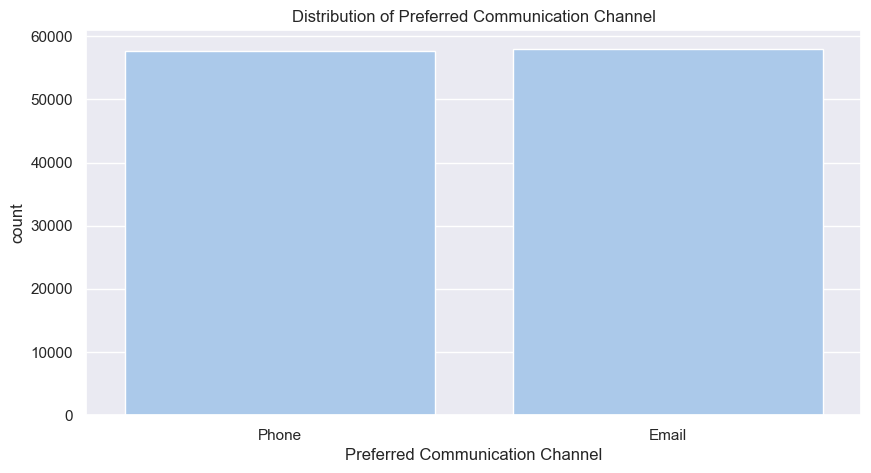

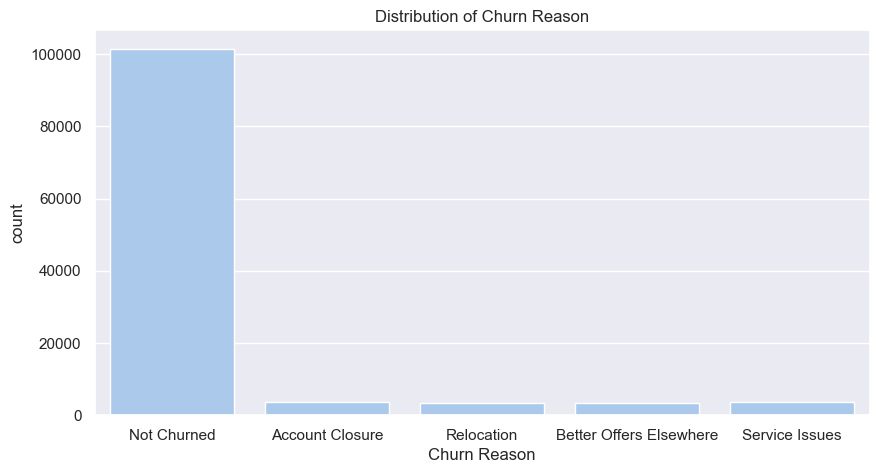

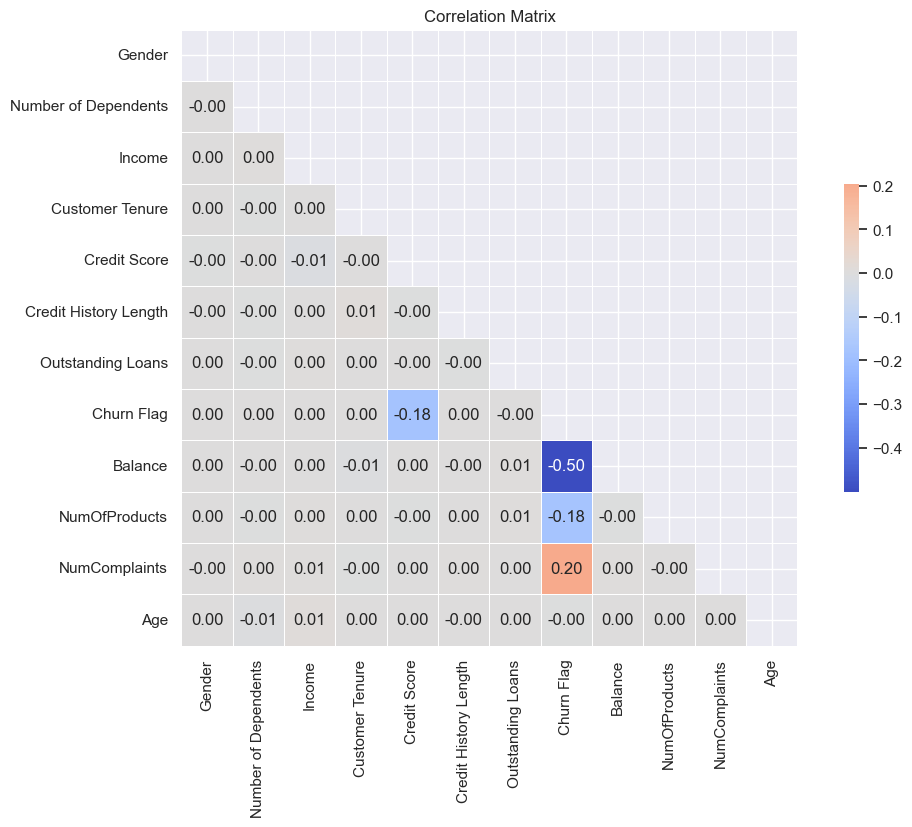

### 📊 Outlier Detection

,Column,Lower Bound,Upper Bound,Outliers,Outlier %
7,Churn Flag,0.000000,0.000000,14094,12.187824
0,Gender,-1.500000,2.500000,0,0.000000
1,Number of Dependents,-3.500000,8.500000,0,0.000000
2,Income,-42403.561250,147624.788750,0,0.000000
3,Customer Tenure,-14.500000,45.500000,0,0.000000
4,Credit Score,22.000000,1126.000000,0,0.000000
5,Credit History Length,-14.500000,45.500000,0,0.000000
6,Outstanding Loans,-23548.225000,74516.535000,0,0.000000
8,Balance,-125704.596250,374819.433750,0,0.000000
9,NumOfProducts,-1.000000,7.000000,0,0.000000



### ⏳ Time Series Analysis

Time series analysis for Churn Date
✅ Cleaned data saved to ../data/Milestone1_result_df.csv


# 📝 EDA Summary Report

### 📈 Dataset Comparison

,Metric,Original,Cleaned
0,Rows,115640,115640
1,Columns,25,19
2,Missing Values,203092,101546
3,Duplicate Rows,0,0



### 🔍 Key Findings

- Data cleaning performed: missing value imputation, duplicate removal
- Visualized distributions of all variables
- Analyzed correlations between numerical variables



### 💡 Recommendations

- Consider feature engineering based on correlations
- Examine outliers in key numerical columns
- Further investigate highly skewed distributions


In [25]:
from IPython.display import display, Markdown

# Visualization settings
%matplotlib inline
sns.set_theme(style="darkgrid", palette="pastel")
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)







# %% [markdown]
# ## 3. Data Overview

# %%
def show_data_overview(df):
    display(Markdown("### 📊 Basic Information"))
    print(f"📐 Dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
    
    # Data types summary
    dtype_counts = df.dtypes.value_counts()
    print("\n🔠 Data Types:")
    for dtype, count in dtype_counts.items():
        print(f"- {dtype}: {count} columns")
    
    # Memory usage
    mem_usage = df.memory_usage(deep=True).sum() / (1024 ** 2)
    print(f"\n💾 Memory Usage: {mem_usage:.2f} MB")
    
    # Missing values summary
    missing = df.isna().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.concat([missing, missing_pct], axis=1)
    missing_df.columns = ['Missing Count', 'Missing %']
    missing_df = missing_df[missing_df['Missing Count'] > 0]
    
    if not missing_df.empty:
        display(Markdown("\n### ❓ Missing Values"))
        display(missing_df.sort_values('Missing %', ascending=False))
    else:
        print("\n🎉 No missing values found!")
    
    # Duplicates check
    dupes = df.duplicated().sum()
    if dupes > 0:
        print(f"\n⚠️ Found {dupes} duplicate rows")
    else:
        print("\n✅ No duplicate rows found")

if not df_clean.empty:
    show_data_overview(df_clean)

# %% [markdown]
# ## 4. Data Cleaning

# %%
def clean_data(df):
    df_clean = df.copy()
    
    
    # Remove duplicates
    initial_rows = len(df_clean)
    df_clean = df_clean.drop_duplicates()
    removed_rows = initial_rows - len(df_clean)
    if removed_rows > 0:
        print(f"🧹 Removed {removed_rows} duplicate rows")
    
    # Remove constant columns
    constant_cols = [col for col in df_clean.columns if df_clean[col].nunique() == 1]
    if constant_cols:
        df_clean = df_clean.drop(columns=constant_cols)
        print(f"🗑️ Removed constant columns: {constant_cols}")
    
    return df_clean

if not df_clean.empty:
    df_clean = clean_data(df_clean)
    print("\n✨ Cleaning complete!")
    print(f"Final shape: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns")
else:
    df_clean = pd.DataFrame()

# %% [markdown]
# ## 5. Statistical Analysis
# %% 

def show_statistics(df):
    if df.empty:
        return
    
    # Numerical columns
    num_cols = df.select_dtypes(include=['number']).columns
    if len(num_cols) > 0:
        display(Markdown("### 🔢 Numerical Variables Statistics"))
        display(df[num_cols].describe().T.style\
               .background_gradient(cmap='Blues', subset=['mean', '50%'])\
               .background_gradient(cmap='Reds', subset=['std', 'max']))
    
    # Categorical columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(cat_cols) > 0:
        display(Markdown("\n### 🔤 Categorical Variables Summary"))
        cat_stats = pd.DataFrame({
            'Unique Values': df[cat_cols].nunique(),
            'Most Common': df[cat_cols].mode().iloc[0],
            'Frequency': [df[col].value_counts().iloc[0] for col in cat_cols],
            'Frequency %': [(df[col].value_counts().iloc[0]/len(df)*100).round(1) for col in cat_cols]
        })
        display(cat_stats.style.background_gradient(cmap='Greens', subset=['Unique Values']))

if not df_clean.empty:
    show_statistics(df_clean)

# %% [markdown]
# ## 6. Data Visualization

# %%
def plot_distributions(df):
    if df.empty:
        return
    
    # Numerical distributions
    num_cols = df.select_dtypes(include=['number']).columns
    for col in num_cols:
        plt.figure(figsize=(14, 5))
        
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        
        plt.tight_layout()
        plt.show()
        
        # Print skewness and kurtosis
        print(f"{col}:")
        print(f"Skewness: {df[col].skew():.2f} | Kurtosis: {df[col].kurtosis():.2f}\n")
    
    # Categorical distributions
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        if df[col].nunique() > 20:
            print(f"Skipping {col} - too many categories ({df[col].nunique()})")
            continue
            
        plt.figure(figsize=(10, 5))
        if df[col].nunique() > 5:
            sns.countplot(y=col, data=df, order=df[col].value_counts().iloc[:15].index)
        else:
            sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.show()

if not df_clean.empty:
    plot_distributions(df_clean)

# %% [markdown]
# ## 7. Correlation Analysis

# %%
def show_correlations(df):
    if df.empty:
        return
    
    num_cols = df.select_dtypes(include=['number']).columns
    if len(num_cols) < 2:
        print("Not enough numerical columns for correlation analysis")
        return
    
    # Correlation matrix
    corr = df[num_cols].corr()
    
    plt.figure(figsize=(12, 8))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
                center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation Matrix')
    plt.show()
    
    # Pairplot for small datasets
    if len(num_cols) <= 6:
        sns.pairplot(df[num_cols])
        plt.suptitle('Pairplot of Numerical Variables', y=1.02)
        plt.show()

if not df_clean.empty:
    show_correlations(df_clean)

# %% [markdown]
# ## 8. Advanced Analysis

# %%
def advanced_analysis(df):
    if df.empty:
        return
    
    # Outlier detection
    display(Markdown("### 📊 Outlier Detection"))
    num_cols = df.select_dtypes(include=['number']).columns
    outliers_list = []
    
    for col in num_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_pct = (len(outliers)/len(df))*100
        
        outliers_list.append({
            'Column': col,
            'Lower Bound': lower,
            'Upper Bound': upper,
            'Outliers': len(outliers),
            'Outlier %': outlier_pct
        })
    
    outliers_df = pd.DataFrame(outliers_list)
    display(outliers_df.sort_values('Outlier %', ascending=False)
           .style.background_gradient(cmap='Reds', subset=['Outlier %']))
    
    # Time series analysis (if datetime columns exist)
    datetime_cols = df.select_dtypes(include=['datetime']).columns
    if len(datetime_cols) > 0:
        display(Markdown("\n### ⏳ Time Series Analysis"))
        for dt_col in datetime_cols:
            print(f"Time series analysis for {dt_col}")
            # Add your time series analysis code here

if not df_clean.empty:
    advanced_analysis(df_clean)

# %% [markdown]
# ## 9. Save Cleaned Data

# %%
if not df_clean.empty:
    output_file = "../data/Milestone1_result_df.csv"
    df_clean.to_csv(output_file, index=False)
    print(f"✅ Cleaned data saved to {output_file}")
else:
    print("No data to save")

# %% [markdown]
# ## 10. Final Report

# %%
if not df.empty and not df_clean.empty:
    display(Markdown("# 📝 EDA Summary Report"))
    
    # Basic comparison
    display(Markdown("### 📈 Dataset Comparison"))
    comparison = pd.DataFrame({
        'Metric': ['Rows', 'Columns', 'Missing Values', 'Duplicate Rows'],
        'Original': [df.shape[0], df.shape[1], df.isna().sum().sum(), df.duplicated().sum()],
        'Cleaned': [df_clean.shape[0], df_clean.shape[1], df_clean.isna().sum().sum(), df_clean.duplicated().sum()]
    })
    display(comparison)
    
    # Key findings
    display(Markdown("\n### 🔍 Key Findings"))
    print("- Data cleaning performed: missing value imputation, duplicate removal")
    print("- Visualized distributions of all variables")
    print("- Analyzed correlations between numerical variables")
    
    # Recommendations
    display(Markdown("\n### 💡 Recommendations"))
    print("- Consider feature engineering based on correlations")
    print("- Examine outliers in key numerical columns")
    print("- Further investigate highly skewed distributions")